## Machine Learning Project: Customer Churn

Bronwyn Bowles-King

### 1. Introduction

This notebook examines customer churn prediction using machine learning (ML) with the Telco Customer Churn dataset from IBM (2019). The project demonstrates a complete ML workflow, including data cleaning, feature and target identification, data exploration and visualisation, and the application of classification models. 

Logistic regression and random forest algorithms are applied with data analysis techniques to predict customer churn. Their performance is compared using metrics such as accuracy, precision, recall, and F1-score. Each model’s strengths and weaknesses are considered, including how well it can identify and thus help retain customers that a business is at risk of losing, and how well it can identify loyal customers from which more business can be cultivated.


### Part A: Preparation steps
#### 2. Import libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix

#### 3. Load dataset

In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv")

### Part B: Data inspection
#### 4. Preview dataset

In [3]:
display(df.head(10))

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


#### 5. View dataset columns

In [4]:
display(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### 6. Check data types

In [5]:
display(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Part C: Data preprocessing phase
#### 7. Convert TotalCharges to numeric data type

Here, the 'TotalCharges' column is changed to a numeric data type, as it was previously an object or string, and this would cause problems later.

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

#### 8. Remove rows with missing values  

A few values are missing from the 'TotalCharges' column. This datapoint could be very important to the churn factor and so I do not want to leave it out when running samples through the ML model. There are very few of them, so the rows that contain them are dropped from the dataframe. 

In [7]:
print(f'Missing values by column: \n{df.isnull().sum()}')  
df = df.dropna()

print(f'\nDataframe size: {df.shape}')

Missing values by column: 
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Dataframe size: (7032, 21)


In [8]:
print(f'Duplicate rows: {df.duplicated().sum()}')

Duplicate rows: 0


#### 9. Drop unneeded columns

The 'customerID' column is not needed for the analysis as it does not contribute to the customer churn factor, and so it is removed.

In [9]:
df = df.drop('customerID', axis=1)

#### 10. Convert Churn column to binary data

In [10]:
df['Churn'] = df['Churn'].map({'Yes': True, 'No': False})

#### 11. Convert categorical variables to dummy variables 

When preparing data for logistic regression and random forest models, categorical variables are converted into a numerical format. A common approach is to use dummy variables or one-hot encoding and this is applied here. A new dataframe called telecom_cust_dummies_df is created to be used going forward (Bauer, 2022).

In [11]:
category_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

telecom_cust_dummies_df = pd.get_dummies(df, columns=category_columns, drop_first=True)

display(telecom_cust_dummies_df.head(10))

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,True,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,False,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,True,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
5,0,8,99.65,820.50,True,False,False,False,True,False,...,False,True,False,True,False,False,True,False,True,False
6,0,22,89.10,1949.40,False,True,False,True,True,False,...,False,True,False,False,False,False,True,True,False,False
7,0,10,29.75,301.90,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
8,0,28,104.80,3046.05,True,False,True,False,True,False,...,False,True,False,True,False,False,True,False,True,False
9,0,62,56.15,3487.95,False,True,False,True,True,False,...,False,False,False,False,True,False,False,False,False,False


### Part D: Data visualisation phase
#### 12. Correlation plot: Customer churn 

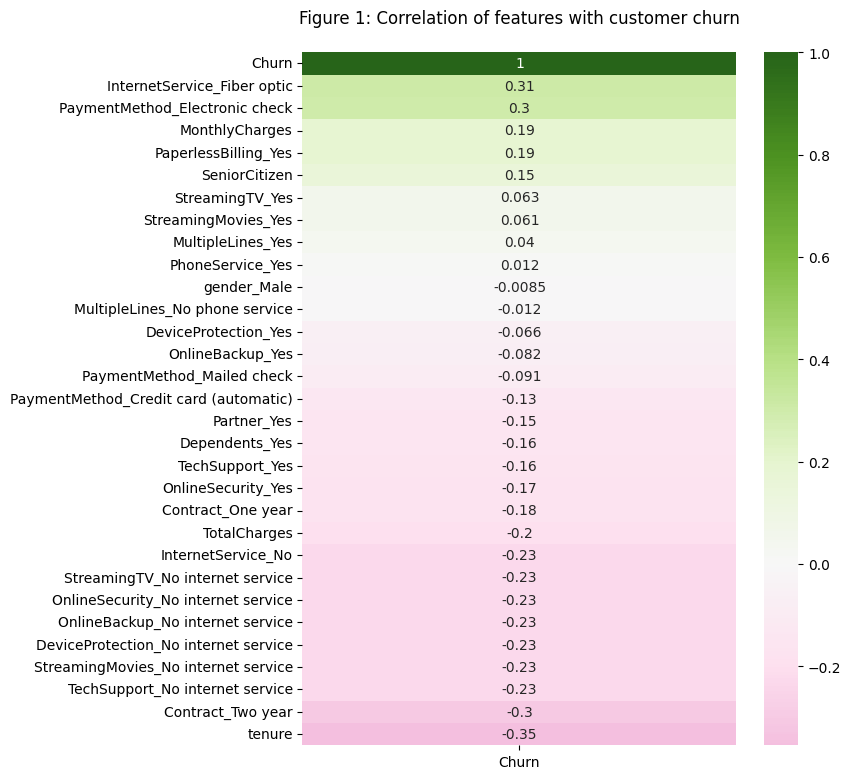

In [12]:
correlation = telecom_cust_dummies_df.corr()
churn_corr = correlation[['Churn']].sort_values(by='Churn', ascending=False)

plt.figure(figsize=(7, 9))
sns.heatmap(churn_corr, annot=True, cmap='PiYG', center=0)
plt.title('Figure 1: Correlation of features with customer churn\n')
plt.show()

#### 13. Histogram: Customer tenure

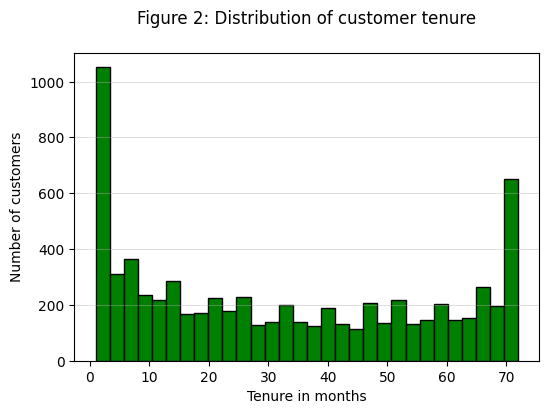

In [13]:
plt.figure(figsize=(6, 4))
plt.hist(df['tenure'], bins=30, color='green', edgecolor='black')
plt.title('Figure 2: Distribution of customer tenure\n')
plt.xlabel('Tenure in months')
plt.ylabel('Number of customers')
plt.grid(axis='y', alpha=0.4)
plt.show()

#### 14. Scatter plot: Monthly and total charges

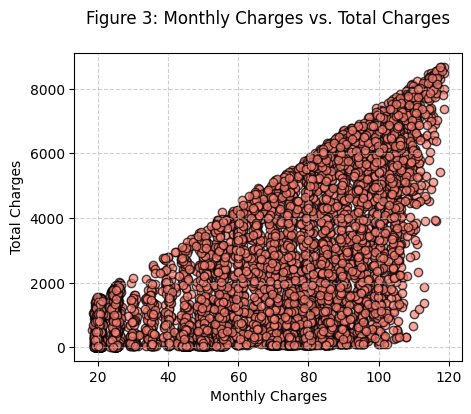

In [14]:
plt.figure(figsize=(5, 4))
plt.scatter(df['MonthlyCharges'], df['TotalCharges'], alpha=0.7, color='salmon', edgecolor='k')
plt.title('Figure 3: Monthly Charges vs. Total Charges\n')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#### 15. Box plot: Tenure and customer churn

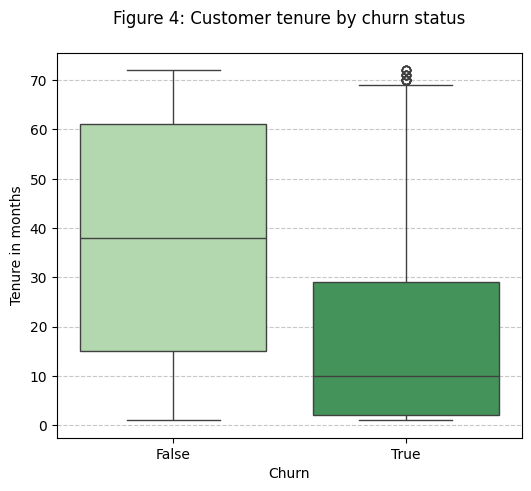

In [15]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='Churn', y='tenure', hue= 'Churn', data=df, palette='Greens', legend=False)
plt.title('Figure 4: Customer tenure by churn status\n')
plt.xlabel('Churn')
plt.ylabel('Tenure in months')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Part E: Preparation for ML training
#### 16. Scale variables with min-max scaling

In [16]:
scaler = MinMaxScaler()
columns_to_scale = [col for col in telecom_cust_dummies_df.columns if col not in ['Churn']]
telecom_cust_dummies_df[columns_to_scale] = scaler.fit_transform(telecom_cust_dummies_df[columns_to_scale])

#### 17. Assign to variables and split dataset into training and test sets 

In [17]:
X = telecom_cust_dummies_df.drop(['Churn'], axis=1)
y = telecom_cust_dummies_df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25,      
    random_state=42,     
    stratify=y         
)

### Part F: Logistic regression model
#### 18. Build the model

In [18]:
log_reg_mod = LogisticRegression(
    solver='liblinear',   # Library for Large Linear Classification
    random_state=42
)

log_reg_mod.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


#### 19. Run predictions on test data

In [19]:
y_predict_lr = log_reg_mod.predict(X_test)
y_proba_lr = log_reg_mod.predict_proba(X_test)[:, 1]  

#### 20. Performance metrics for logistic regression model

In [20]:
print('LOGISTIC REGRESSION MODEL')

print('\nClassification Report\n')
print(classification_report(y_test, y_predict_lr))

print('Confusion Matrix')
print(confusion_matrix(y_test, y_predict_lr))

LOGISTIC REGRESSION MODEL

Classification Report

              precision    recall  f1-score   support

       False       0.85      0.89      0.87      1291
        True       0.65      0.57      0.61       467

    accuracy                           0.80      1758
   macro avg       0.75      0.73      0.74      1758
weighted avg       0.80      0.80      0.80      1758

Confusion Matrix
[[1148  143]
 [ 200  267]]


### Part G: Random forest model
#### 21. Build the model

The X and y variables are the same for the random forest as for the logistic regression model. The original training and test sets (section 17) are thus used again here. This is done because when we come to compare the models' performance, it will be based on the same training and test data.

In [21]:
rf = RandomForestClassifier(
    random_state=42, 
    n_jobs=-1, 
    n_estimators=2000, 
    max_leaf_nodes=50, 
    max_features='sqrt', 
    oob_score=True    # bootstrap=True is default
    )  

#### 22. Fit random forest model

In [22]:
rf.fit(X_train, y_train)

,n_estimators,2000
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,50
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


#### 23. Run predictions on test data

In [23]:
y_predict_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]  

#### 24. Performance metrics for random forest model

In [24]:
print('RANDOM FOREST MODEL')

print('\nClassification Report\n')
print(classification_report(y_test, y_predict_rf))

print('Confusion Matrix')
print(confusion_matrix(y_test, y_predict_rf))

RANDOM FOREST MODEL

Classification Report

              precision    recall  f1-score   support

       False       0.83      0.91      0.87      1291
        True       0.65      0.47      0.54       467

    accuracy                           0.79      1758
   macro avg       0.74      0.69      0.70      1758
weighted avg       0.78      0.79      0.78      1758

Confusion Matrix
[[1174  117]
 [ 249  218]]


#### 25. OOB score and error

Out-of-bag (OOB) samples are used for ensemble models like bagged random forests. OOB samples are data points not included in the bootstrap sample for a certain decision tree during training. Only trees that did not see a certain OOB sample in the training data are tested with this sample. This process happens for all random forests.

About two-thirds of the original training set is used for training each tree and these are called bootstrap samples. The remaining one-third of the training data not selected to train a certain tree is then used for a preliminary accuracy test. These samples are the OOB samples (Bauer, 2022). 

The oob_score parameter was set to True for the model in section 21. When this parameter is True, the model, which always makes use of OOB sampling, also estimates performance on the OOB samples and these results can be called. The OOB score below indicates accuracy, which is the proportion of correctly predicted samples. In this case, 79.9% of OOB samples were correctly predicted.

The OOB error is 1 minus the oob_score, or the proportion of misclassified OOB samples. The OOB error is 0.201. Together with the OOB score, this shows an acceptable level of accuracy.

The OOB score and error apply to the training phase of the process. When the score is calculated, the model has not yet been tested on the test set, which is data separate from the training data, and so the model has not yet worked with this data at all. OOB scoring is a type of internal cross-validation (CV). It is an early but sometimes limited measure of success or of problems with a model. More tests are needed to come to a clear picture of what a model is capable of, and this will be investigated in the last three sections of the report (Zvornicanin, 2024). 

In the classification report in section 24 above, the accuracy score is also 0.79, which is likely a coincidence. This accuracy score is not the same as the OOB score because it is based on the test set. However, that the scores are both good shows that the model performed just as well with completely unseen data compared to partially seen data (OOB samples). This indicates the model is performing consistently and capable of generalising to unseen data.

In [25]:
print(f"Random forest OOB score: {rf.oob_score_:.3f}")
print(f"Random forest OOB error: {1 - rf.oob_score_:.3f}")

Random forest OOB score: 0.799
Random forest OOB error: 0.201


### Part H: Model evaluation
#### 26. Confusion matrices: Logistic regression and random forest models

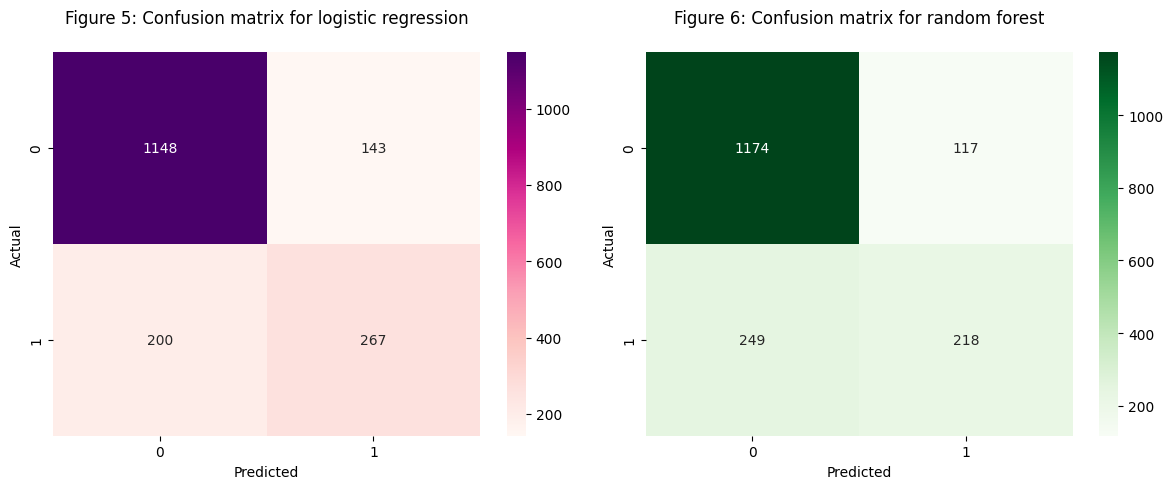

In [ ]:
cm_lr = confusion_matrix(y_test, y_predict_lr)
cm_rf = confusion_matrix(y_test, y_predict_rf)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Logistic regression
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='RdPu', ax=axes[0])
axes[0].set_title('Figure 5: Confusion matrix for logistic regression\n')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Random forest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Figure 6: Confusion matrix for random forest\n')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

#### 27. Evaluation of model performance 

##### 27.1 Precision scores

The precision and recall scores are calculated below and they are also in the classification reports for both models above (section 20 and 24). The precision score is the ratio of correctly predicted positive customer churn (TP) to all predicted positives, including incorrect ones (TP + FP). A higher recall (closer to 1) shows that the model more effectively identifies customers that will leave compared to how often it incorrectly predicts this. 

The formula and results for the two models are shown below:

$\frac{TP}{TP + FP}$

Logistic regression model precision:

$\frac{267}{267 + 143} = 0.6512$

Random forest model precision:

$\frac{218}{218 + 117} = 0.6507$

The logistic regression model has a precision score of 0.6512 and the random forest precision score is not much different at 0.6507. In this case, the models appear to perform similarly. However, the precision scores need to be considered in terms of the actual TP and FP numbers as it only gives us a partial view of the the two models' performance. 

Regarding TP, the logistic regression model was correct more often (267 times), but less often correct for FP (143) (see section 28 below). Conversely, the random forest model was less often correct for TP (218), but correct more often for FP (117). The precision scores are similar because these numbers balance each other out, giving the similar result of ~0.65 shown above. 

Nevertheless, the picture of customer churn when analysed in this way is more complex. The results do not mean that the models performed equally well in predicting both TP and FP. 

Instead, the *logistic regression model was more often effective with predicting that a customer will stop using services* (higher TP) and the *random forest model made fewer mistakes when trying to predict if a customer will leave* (lower FP). Both of these factors are of interest from a marketing and sales position and this will be explored further in section 28 and 29.   

##### 27.2 Recall scores

The recall score is the ratio of correctly predicted positive customer churn (TP) to correctly predicted positives and incorrectly predicted negatives (TP + FN). A higher recall (closer to 1) shows that the model more effectively identifies customers that will leave compared to how often it incorrectly predicts that customers will continue using services. This is slightly different to precision, which includes FP instead of FN in the equation. 

The formula and results for the two models are shown below:

$\frac{TP}{TP + FN}$

Logistic regression model precision:

$\frac{267}{267 + 200} = 0.5717$

Random forest model precision:

$\frac{218}{218 + 249} = 0.4668$

The recall scores are ~0.57 and ~0.47 for the logistic regression and random forest models, respectively. These results are low because of the high number of FN predictions in the divisor of the equation (logistic regression: 200, and random forest: 249). 

This is concerning, but both models could be trained to avoid making incorrect predictions that a customer is loyal when in fact they stop using the company's services (FN). More training iterations and training data on this factor would be highly valuable to improve the models as it is important not to overlook customers who are likely to churn.

The actual figures in the equations show that the *logistic regression model was more often effective with predicting that a customer will discontinue using services* (higher TP). Conversely, the *random forest model made more mistakes when trying to predict that a customer will continue using services* (higher FN).

When considering recall versus precision scores, recall can be more important for customer churn because missing a customer who is likely to leave (FN) can be more costly than incorrectly flagging a loyal customer (FP). It may be best to use the logistic regression model more to predict whether customers will stop using services as it has higher recall, but there is still considerable need for improvement.

##### 27.3 F1-scores 

The F1-score combines precision and recall into a single measure. The dividend part of the F1-score formula includes the harmonic mean, which makes it useful when trying to compare ratios. Chugani (2024) explains: 

> The data science field heavily utilizes the harmonic mean, particularly in machine learning applications. It's the foundation of the F1-score, which balances precision and recall in classification problems.

Due to its usefulness, the F1-score will be explored here for the two models. The formula and results are shown below:

$2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$

Logistic regression model F1-score:

$2 \times \frac{\ 0.6512 \times 0.5717}{\ 0.6512 + 0.5717} \approx 0.6089$

Random forest model F1-score:

$2 \times \frac{\ 0.6507 \times 0.4668}{\ 0.6507 + 0.4668} \approx 0.5436$

The F1-scores are ~0.61 and ~0.54 for the logistic regression and random forest models, respectively. This means that the logistic regression model developed here is better than the random forest in predicting customer churn in that it makes fewer mistakes overall. In other words, the total mistakes (FP + FN) are taken into account, which is 343 for the logistic regression model and 366 for the random forest. 

The equation above does this by including both FP from the precision score and FN from the recall score of the same model, giving us a better idea of *how often each model fails to identify customer churn as well as customer loyalty*. This can help us decide which model to use when we need to mitigate mistakes either way as they are equally costly.

In [27]:
precision_lr = precision_score(y_test, y_predict_lr)
recall_lr = recall_score(y_test, y_predict_lr)
# default f1_score average=binary for target with two possibilities
f1_lr = f1_score(y_test, y_predict_lr)  

print("LOGISTIC REGRESSION MODEL")
print(f"Precision score: {precision_lr:.4f}")
print(f"Recall score: {recall_lr:.4f}")
print(f"F1-score: {f1_lr:.4f}")

precision_rf = precision_score(y_test, y_predict_rf)
recall_rf = recall_score(y_test, y_predict_rf)
f1_rf = f1_score(y_test, y_predict_rf)

print("\nRANDOM FOREST MODEL")
print(f"Precision score: {precision_rf:.4f}")
print(f"Recall score: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")

LOGISTIC REGRESSION MODEL
Precision score: 0.6512
Recall score: 0.5717
F1-score: 0.6089

RANDOM FOREST MODEL
Precision score: 0.6507
Recall score: 0.4668
F1-score: 0.5436


#### 28. Discussion of model performance in predicting customer churn

The confusion matrices (Figure 5 and 6) indicate the following *correct predictions* for customer churn:

>**True positives (TP):** Actual = 1 and Predicted = 1

This is the bottom-right cell. These *customers stopped using the company's services*. The logistic regression model correctly predicted this 267 times, and performed better than the random forest model, which was correct in 218 cases. 

>**True negatives (TN):** Actual = 0 and Predicted = 0

The top-left cell. The models correctly predicted that the *customer will not stop using services* in these cases. The logistic regression model correctly predicted this 1 148 times, but the random forest model was correct more often with 1 174 cases. 

The confusion matrices also show the following *incorrect predictions*:

>**False positives (FP):** Actual = 0 and Predicted = 1

The top-right cell. The models *predicted that the customer will leave, but they did not*. The logistic regression model incorrectly predicted this more often (143 cases). The random forest model was incorrect less often (117 cases).

>**False negatives (FN):** Actual = 1 and Predicted = 0

The bottom-left cell. The models *predicted that the customer would not stop using services, but they did*. The logistic regression model incorrectly predicted this 200 times, which is less often than the random forest model, which was incorrect in 249 cases.   

#### 29. Model comparison

The logistic regression model was correct 1 415 times, and the random forest model was correct 1 392 times (TP + TN). The logistic regression model was incorrect 343 times, and the random forest model was incorrect 366 times (FP + FN). Therefore, overall, the logistic regression model has performed better than the random forest model. For general correctness, one could then choose the logistic regression model over the random forest model.

However, the individual results in the confusion matrices show that the random forest model performed better (TN) and made fewer mistakes (FP) when predicting whether a *customer will not stop using services*. On the other hand, the logistic regression model was more accurate when predicting that a *customer will stop using services* (TP) and thus made fewer mistakes (FN) in this regard. 

*Correct predictions for actual customer churn or loss* (TP) can be the most important if the company wants to know when to *make additional effort to retain a certain customer* through sales and marketing, such as offering specials or free or low-cost add-on services. There is also no real risk in targeting someone predicted to leave with specials and add-on services when they are actually unlikely to leave (FP). Therefore, the company will be interested in the results from the logistic regression model, which was more accurate in these two areas. 

The random forest results are still highly useful because the model is better at *predicting customers who are loyal* (TN and FP). These results tell us the *type of consumers who are potential customers* and this is also important for marketing purposes. Both models thus offer major advantages and can be used together to arrive at an accurate picture of factors affecting customer churn and customer loyalty. 

### Conclusion

I have presented an analysis of customer churn using logistic regression and random forest models above. The results show that logistic regression slightly outperforms the random forest model for this dataset in identifying customers likely to churn, particularly in terms of good recall and F1-score. 

However, both models have value as the random forest correctly identifies loyal customers. Specific business priorities and goals can be targeted and the best model used to decide on a way forward to increase customer retention and customer loyalty with these ML models. 

### References

Chugani, V (2024). Harmonic Mean Explained: A Guide to Rates and Ratios. DataCamp. https://www.datacamp.com/tutorial/harmonic-mean

Geeks for Geeks. (2025). OOB Errors for Random Forests in Scikit Learn. https://www.geeksforgeeks.org/machine-learning/oob-errors-for-random-forests-in-scikit-learn

HyperionDev. (2025a). Image Processing. Course materials. Private repository, GitHub.

HyperionDev. (2025b). Machine Learning. Course materials. Private repository, GitHub.

HyperionDev. (2025c). Supervised Learning – Random Forests. Course materials. Private repository, GitHub.

IBM. (2019). Telco customer churn (11.1.3+). IBM Samples Team. https://community.ibm.com/community/user/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

Bauer, P. (2022). *Computational Social Science*. https://bookdown.org/paul/computational_social_science

scikit-learn. (2024b). sklearn.metrics. https://scikit-learn.org/stable/modules/generated/sklearn.metrics

scikit-learn. (2024c). RandomForestClassifier. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

scikit-learn. (2024d). sklearn.ensemble. https://scikit-learn.org/stable/api/sklearn.ensemble.html#module-sklearn.ensemble

scikit-learn. (2024e). train_test_split. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

StackOverflow. (2018). Logistic regression python solvers' definitions. https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-definitions

Zvornicanin, E. (2024). Out-of-bag Error in Random Forests. Baeldung. https://www.baeldung.com/cs/random-forests-out-of-bag-error